# FALLACIES Dataset Exploratory Data Analysis

URL: https://github.com/Raising-hrx/FALLACIES

In [1]:
%load_ext autoreload
%autoreload 2

from src.fallacies import get_fallacy_df
from src.plot import save_plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
df_fallacies_e11 = get_fallacy_df('data/fallacies_e11.csv')

df_fallacies_e11.head()

[2024-11-14 09:16:14] Loaded existing fallacy dataframe from data/fallacies_e11.csv.


,step,entity,fallacy,label,category,subcategory,gpt_4o_response,gpt_4_response,gpt_4o_mini_response,claude_3_5_sonnet_response,...,gemini_1_5_pro_response,gemini_1_5_flash_response,gemini_1_5_flash_8b_response,llama_3_1_70b_response,llama_3_1_8b_response,mistral_large_2_response,mistral_small_2_response,o1_preview_response,o1_mini_response,claude_3_5_sonnet_20241022_response
0,Since John asked Maria if she used the last of...,tepas,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,No,No,No,No.,No.,No,No,No
1,Since Alice asked if Bob knew what an 'ossia' ...,ossia,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,No,No,No,No.,No.,No.,No,No
2,Since Alice claims that the Hausdorff contents...,hausdorff contents,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,No,No,No,No.,No.,No.,No,No
3,"Since Tom, a seasoned tugboater, said that ice...",tugboaters,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,Yes,No,No,No,No.,No.,No.,No.,No,No
4,Since John accuses Mary of being terrified of ...,beewolf,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,No,No,No,No.,No.,No.,No,No


In [3]:
df_fallacies_count = df_fallacies_e11.groupby(['category', 'subcategory'], observed=True).size().to_frame('count')
df_fallacies_count = df_fallacies_count.sort_values(by=['category', 'count'], ascending=[False, False]).reset_index()
df_fallacies_count

,category,subcategory,count
0,informal,irrelevance,1560
1,informal,insufficiency,1160
2,informal,inappropriate presumption,1080
3,informal,ambiguity,300
4,informal,inconsistency,60
5,formal,syllogistic,160
6,formal,propositional,120
7,formal,quantificational,120
8,formal,probabilistic,80


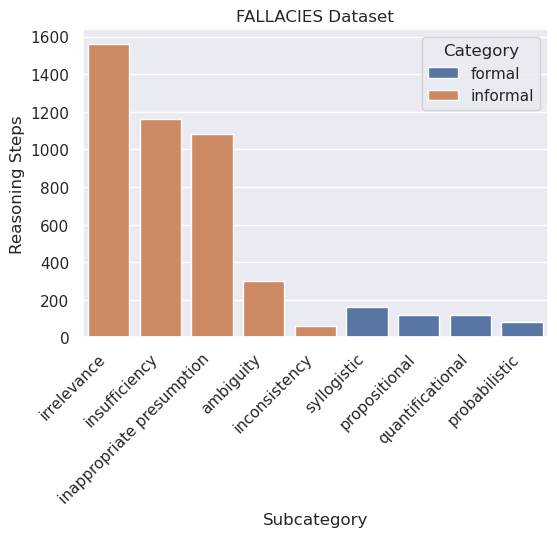

In [4]:
# Convert categorical column to get bar order right
df_fallacies_count['subcategory'] = df_fallacies_count['subcategory'].astype(str)

_, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='subcategory', y='count', data=df_fallacies_count, hue='category', ax=ax)
plt.xticks(rotation=45, ha='right')
title = 'FALLACIES Dataset'
plt.title(title)
plt.xlabel('Subcategory')
plt.ylabel('Reasoning Steps')
plt.legend(title='Category')

save_plot(title)
plt.show()

- The FALLACIES dataset contains 4640 reasoning steps, divided into 232 different fallacy types.
- For each fallacy type, there are 10 correct and 10 incorrect reasoning steps.
- The fallacy types are grouped into 4 formal and 5 informal subcategories.
- There are more informal than formal fallacy types.
- To account for category and subcategory imbalance, the accuracies are based on macro-averaging.
